<a href="https://colab.research.google.com/github/mervekldrm/bioinformatics/blob/main/tp53_translation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP53 mRNA to Protein Translation and Amino Acid Frequency Analysis

This notebook performs the following tasks:
1. Translates the TP53 mRNA coding sequence (CDS) to a protein.
2. Saves the protein sequence to a FASTA file.
3. Reads the FASTA file back.
4. Calculates amino acid frequencies and saves to CSV/TSV.
5. Plots a histogram of the frequencies.

In [3]:
try:
    import google.colab
    # Running on Google Colab, so install Biopython first
    !pip install biopython
except ImportError:
    pass

In [4]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os

In [5]:
tp53_cds = ("ATGGAGGAGCCGCAGTCAGATCCTAGCGTCGAGCCCCCTCTGAGTCAGGAAACATTTTCAGACCTATGGAAACTACTTCCTGAAAACAACGTTCTGTCCCC"
            "TTCCTTTGTCCCCCACCTCAGCATCTTATCCGAGTGGAAGGAAATTTGCGTGTGGAGTATTTGGATGACAGAAACACTTTTCGACATAGTGAGCATCGAG"
            "GGTGGCTGGGAGTAGATGGAGCCTGGTTGTAGGTGGTGGTACAGTCAGAGCCAACCTCAGGCGGCTCATAGGAGATGGCCCATGCAGGAACTGCACCCTT"
            "GGCAACCACCATGAGCGCTGCTCAGATAGCGATGGTGAGCCTGGGCATCCTTGAGGGTGCTGCCCCCAGGGAGCGCAAAGAGGTCAGGAGCTGCTGGTGA"
            "CTGACAACCACTGGATGGAGAATATTTCACCCTTCAGATCCGTGGGCGTGAGCGCTTCGAGATGTTCCGAGAGCTGAATGAGGCCTTGGAACTCAAGGAT"
            "GTCGTGAGACGCTTTCCACGACGGTGACACGCTTCCCTGGATTGGCTCTGACTGTACCACCATCCACTACAACTACATGTGTAACAGTTCCAAAGGGCAG"
            "CTACGGTTTCCGTCTGGGCTTCTTGCATTCTGGGACAGCCAAGTCTGTGACTTGCACGTACACAAAGTGTTTCTGTCCTTCAGGCCCTTCTGTCTTGCAC"
            "ACGTACTCCCCTGCCCTCAACAAGATGTTTTGCCAACTGGCCAAGACCTGCCCTGTGCAGCTGTGGGTTGATTCCACACCCCCGCCATAAAAATCATTTT"
            "TGTCCCTTCCCAGAAAACCTACCAGGGCAGCTACGGTTTCCGTCTGGGCTTCTTGCATTCTGGGACAGCCAAGTCTGTGACTTGCACGTACACAAAGTGT"
            "TTCTGTCCTTCAGGCCCTTCTGTCTTGCACACGTACTCCCCTGCCCTCAACAAGATGTTTTGCCAACTGGCCAAGACCTGCCCTGTGCAGCTGTGGGTTG"
            "ATTCCACACCCCCGCCATAAAAATCATTTTTGTCCCTTCCCAGAAAACCTAC")
seq_obj = Seq(tp53_cds)
protein_seq = seq_obj.translate(to_stop=True)

protein_record = SeqRecord(
    protein_seq,
    id="TP53_HUMAN",
    description="Translated TP53 protein from mRNA CDS (NM_000546.6)"
)

output_dir = "tp53_output"
os.makedirs(output_dir, exist_ok=True)
fasta_path = os.path.join(output_dir, "tp53_protein.fasta")
SeqIO.write(protein_record, fasta_path, "fasta")

1

In [6]:
record = SeqIO.read(fasta_path, "fasta")
aa_freq = dict(Counter(str(record.seq)))
df_freq = pd.DataFrame(aa_freq.items(), columns=["Amino Acid", "Frequency"]).sort_values(by="Amino Acid")
csv_path = os.path.join(output_dir, "amino_acid_frequencies.csv")
tsv_path = os.path.join(output_dir, "amino_acid_frequencies.tsv")
df_freq.to_csv(csv_path, index=False)
df_freq.to_csv(tsv_path, index=False, sep='\t')
df_freq

,Amino Acid,Frequency
15,C,1
5,D,3
1,E,10
9,F,3
16,G,2
13,H,1
14,I,5
11,K,2
7,L,8
0,M,2


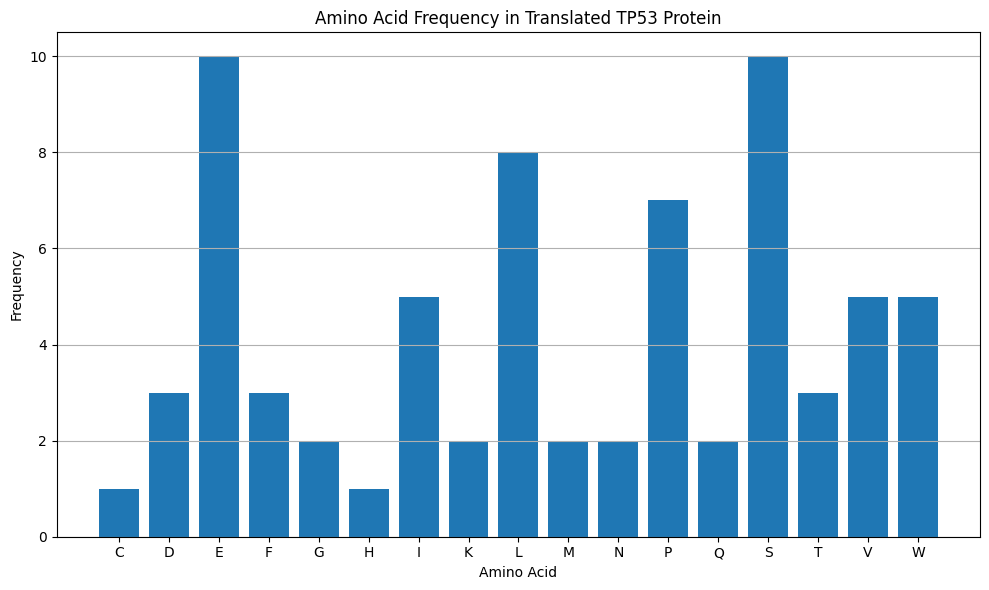

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(df_freq["Amino Acid"], df_freq["Frequency"])
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.title("Amino Acid Frequency in Translated TP53 Protein")
plt.grid(axis='y')
plt.tight_layout()
histogram_path = os.path.join(output_dir, "amino_acid_histogram.png")
plt.savefig(histogram_path)
plt.show()